# 타이타닉 머신러닝 재난.

데이터 세트를 기반으로 승객이 생존할 수 있는지 없는지 여부 확인하기

### Data 로드

In [1]:
import pandas as pd

test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [2]:
print(train_df.columns)
# PassengerID  승객수 탑승 인덱스
# Survied  생존여부 0:사망 1:생존
# Pclass 티켓 틍급
# Name  이름 (이건 미신아닌가?)
# Sex  성별
# Age 나이
# SibSp 동승한 형제자매 또는 배우자 수 (비슷한 연령대겟지?)
# parch 탑승한 부모 자녀 수 (나이차이 많이나겟지?)
# Ticket (티켓 넘버.. 이거는 어따스라고? 암살 의혹?)
# Fare 요금
# Cabin 객실번호
# Embarked  출발항구 C (cherbourg), Q (queenstown), S (southampton)
print(train_df.head(5))

# 분포 비율 확인
print('-----------------Survived-------------------')
print(train_df['Survived'].value_counts())
print('-----------------Pclass-------------------')
print(train_df['Pclass'].value_counts())
print('-----------------Sex-------------------')
print(train_df['Sex'].value_counts())

# 대부분 혼자 탓네
print('-----------------SibSp-------------------')
print(train_df['SibSp'].value_counts())
print('-----------------parch-------------------')
print(train_df['Parch'].value_counts())


# 성별 생존자  상관관계1)
survied_df = train_df[train_df['Survived'] == 1 ]
print(survied_df['Sex'].value_counts().sort_index() / train_df['Sex'].value_counts().sort_index())

# 요금 생존자 비율 관련성
per_Fare = survied_df['Fare'].value_counts().sort_index() / train_df['Fare'].value_counts().sort_index()
print(per_Fare)

#객실
sibsp = train_df['SibSp']
age = train_df['Age']


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0

### 데이터 분석

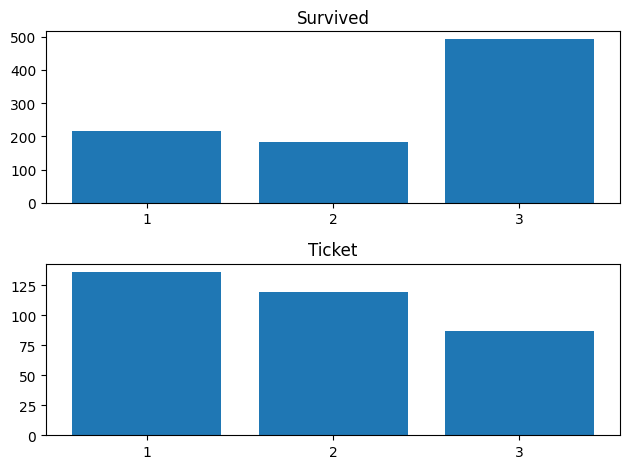

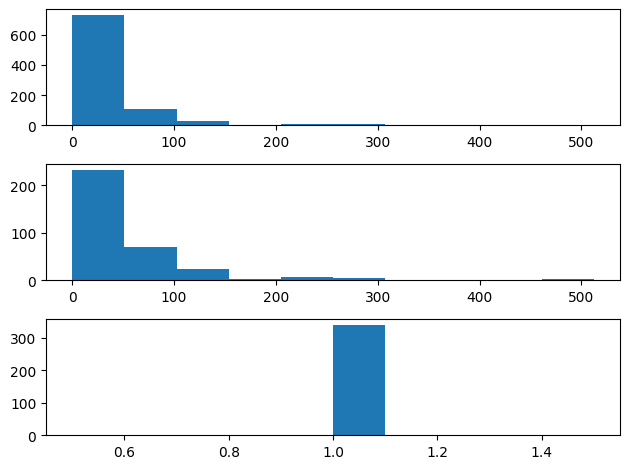

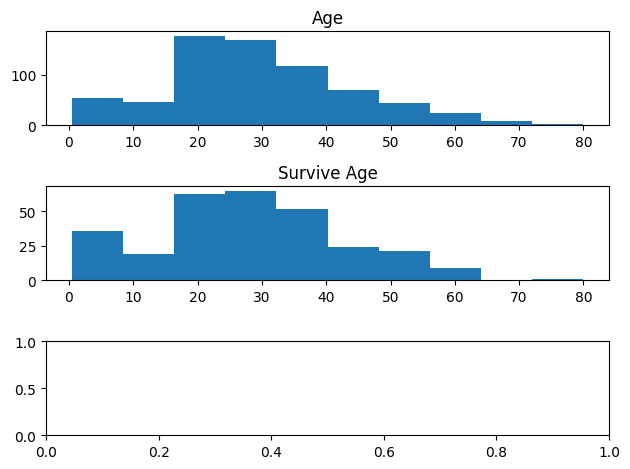

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1)

ax[0].set_title("Survived")
ax[0].bar(['1', '2', '3'], train_df['Pclass'].value_counts().sort_index())

ax[1].set_title("Ticket")
ax[1].bar(['1', '2', '3'], survied_df['Pclass'].value_counts())

plt.tight_layout()
plt.show()


fig, ax = plt.subplots(3, 1)
ax[0].hist(train_df['Fare'])
ax[1].hist(survied_df['Fare'])
ax[2].hist(survied_df['Fare'] / train_df['Fare'])
plt.tight_layout()
plt.show()
# ax[0].scatter(train_df['Survived'], train_df['Sex'])


fig, ax = plt.subplots(3, 1)
ax[0].set_title("Age")
ax[0].hist(train_df['Age'])

ax[1].set_title("Survive Age")
ax[1].hist(survied_df['Age'])
plt.tight_layout()
plt.show()

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


X = train_df.select_dtypes(include=['number'])

y = train_df.Survived
X = X.drop(columns=['Survived'])

test_df = pd.read_csv('test.csv')
# _y = test_df.Survived
_x = test_df.select_dtypes(include=['number'])

model = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=1)

model.fit(X_train, y_train)

y_pred = model.predict(_x)

print(len(y_pred))

418


In [5]:
len(train_df)
len(y_pred)

418

In [6]:
predict = pd.DataFrame(y_pred, columns=['Survived'], index=range(len(train_df) + 1, len(train_df) + 1 + len(y_pred)))
predict.index.name = 'PassengerId'

predict.to_csv("simple_decisionTree.csv", index=True)

In [7]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X = train_df
y = train_df.Survived

X = X.drop(columns=['Name'])
X['Sex'] = X['Sex'].map({'male': 1, 'female': 2})

X = X.drop(columns=['Survived', 'PassengerId'])
X = X.select_dtypes(include=['number'])

_y = test_df
_y = _y.drop(columns=['Name'])
_y['Sex'] = _y['Sex'].map({'male': 1, 'female': 2})

_y = _y.drop(columns=['PassengerId'])
_y = _y.select_dtypes(include=['number'])

X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=1)

logistic = RandomForestClassifier(random_state=1)
logistic.fit(X_train, y_train)

y_pred = logistic.predict(_y)
# mean_absolute_error(y_test, y_pred)
y_pred

predict = pd.DataFrame(y_pred, columns=['Survived'], index=range(len(train_df) + 1, len(train_df) + 1 + len(y_pred)))
predict.index.name = 'PassengerId'
predict.to_csv("simple_classfication.csv", index=True)


In [8]:
_y = test_df
_y = _y.drop(columns=['Name'])
_y['Sex'] = _y['Sex'].map({'male': 1, 'female': 2})

_y = _y.drop(columns=['Survived', 'PassengerId'])
_y = _y.select_dtypes(include=['number'])


KeyError: "['Survived'] not found in axis"

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
import xgboost as xgb
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier


test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

train_df.dropna(subset=['Pclass', 'Sex', 'Survived'], inplace=True)

X = train_df
y = train_df.Survived
# X = X.drop(columns=['Name'])
# Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
X = X[['Sex', 'Pclass', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})


label_enc = LabelEncoder()

X['Sex'] = label_enc.fit_transform(X['Sex'])
X['Embarked'] = label_enc.fit_transform(X['Embarked'])

# 새로운 피처 생성
X['FamilySize'] = X['SibSp'] + X['Parch'] + 1

# X = X.drop(columns=['Survived', 'PassengerId', ])
X = X.select_dtypes(include=['number'])

X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=1)
# 0.7892376681614349
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

cat_model = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, cat_features=cat_features, verbose=100)


logistic = RandomForestClassifier(random_state=1)
cat_model.fit(X_train, y_train)

y_pred = cat_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

ImportError: Error importing numpy: you should not try to import numpy from
        its source directory; please exit the numpy source tree, and relaunch
        your python interpreter from there.

In [12]:
df = pd.read_csv("train.csv")
df2 = pd.read_csv('test.csv')


label_enc = LabelEncoder()
# 간단한 피처 엔지니어링
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # 성별 숫자로 변환
df = df[['Sex', 'Pclass', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']]  # 필요한 컬럼만 사용
df['Sex'] = label_enc.fit_transform(df['Sex'])
df['Embarked'] = label_enc.fit_transform(df['Embarked'])
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df2['Sex'] = df2['Sex'].map({'male': 0, 'female': 1})  # 성별 숫자로 변환

df2['Sex'] = label_enc.fit_transform(df2['Sex'])
df2['Embarked'] = label_enc.fit_transform(df2['Embarked'])

# 새로운 피처 생성
df2['FamilySize'] = df2['SibSp'] + df2['Parch'] + 1

# X = X.drop(columns=['Survived', 'PassengerId', ])
X = X.select_dtypes(include=['number'])
test_X = df2[['Sex', 'Pclass', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]



xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)



# 새로운 피처 생성

# X = X.drop(columns=['Survived', 'PassengerId', ])
X = X.select_dtypes(include=['number'])

# X, y 분리
X = df[['Sex', 'Pclass', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
y = df['Survived']

X = X.select_dtypes(include=['number'])
test_X = test_X.select_dtypes(include=['number'])

# 모델 학습
model = RandomForestClassifier()
xgb_model.fit(X, y)

# 예측값과 MAE 확인
y_pred = xgb_model.predict(test_X)


predict = pd.DataFrame(y_pred, columns=['Survived'], index=range(len(train_df) + 1, len(train_df) + 1 + len(y_pred)))
predict.index.name = 'PassengerId'
predict.to_csv("Xgboost.csv", index=True)
